In [1]:
import pandas as pd 
import numpy as np
df= pd.read_csv('data.csv')
df.head()

,actual_label,model_RF,model_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


In [2]:
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0).astype('int')
df.head()

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,1
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,1
4,0,0.418302,0.369532,0,1


In [3]:
def confusion_matrix(y_true, y_predicted):
    u = np.unique(y_true).tolist()
    trues = []
    predicteds = []
    for i in range(len(y_true)):
        trues.append(u.index(y_true[i]))
        predicteds.append(u.index(y_predicted[i]))
    Matrix = [[0 for x in range(len(u))] for y in range(len(u))] 
    for i in range(len(y_true)):
        Matrix[trues[i]][predicteds[i]] += 1
    return np.array(Matrix)
confusion_matrix(df['actual_label'], df['predicted_RF'])


array([[5519, 2360],
       [2832, 5047]])

In [4]:
import numpy as np

def accuracy_score(y_true, y_predicted):
    matrix = confusion_matrix(y_true, y_predicted)
    diag = np.trace(matrix)
    array = np.array(matrix)
    sum_all = np.sum(array)
    return diag/sum_all

accuracy_score(df.actual_label, df.predicted_RF)



0.6705165630156111

In [5]:
def precision_score(y_true, y_predicted):
    matrix = confusion_matrix(y_true, y_predicted)
    res = []
    col_num = len(matrix[0])
    for i in range(col_num):
        res.append(matrix[i][i] / np.sum(matrix[:,i]))
    return res

precision_score(df.actual_label, df.predicted_RF)


[0.6608789366542929, 0.681382476036182]

In [6]:
def recall_score(y_true, y_predicted):
    matrix = confusion_matrix(y_true, y_predicted)
    res = []
    row_num = len(matrix)
    for i in range(row_num):
        res.append(matrix[i][i] / np.sum(matrix[i]))
    return res
    
recall_score(df.actual_label, df.predicted_RF)

[0.7004696027414646, 0.6405635232897576]

In [7]:
def f1_score(y_true, y_predicted):
    precision = precision_score(y_true, y_predicted)
    recall= recall_score(y_true, y_predicted)
    return list(np.divide(2 * np.multiply(precision, recall),(np.add(precision, recall))))
    
f1_score(df.actual_label, df.predicted_RF)

[0.6800985828712262, 0.660342797330891]

In [8]:
import numpy as np

def specificity_score(y_true, y_predicted):
    matrix = confusion_matrix(y_true, y_predicted)
    row_num = len(matrix)
    res = []
    for i in range(row_num):
        a = np.delete(matrix, i, 0)
        b = np.delete(a, i, 1)
        tn = np.sum(b)
        fp = np.sum(matrix[:,i]) - matrix[i][i]
        res.append(tn/(tn+fp))
    return res

specificity_score(df.actual_label, df.predicted_RF)

[0.6405635232897576, 0.7004696027414646]

In [10]:
def roc_auc_score(y_true, y_predicted):
    recall = recall_score(y_true, y_predicted)
    specificity = specificity_score(y_true, y_predicted)
    sum = np.add(specificity, recall)
    return np.divide(sum, 2)
    
roc_auc_score(df['actual_label'], df['predicted_RF'])


array([0.67051656, 0.67051656])

In [11]:
def roc_curve(y_true, y_predicted):
    thresh = 0.0
    points = []
    my_dict = {}
    for i in range(len(np.unique(y_true))):
        my_dict[str(i)] = []
    while thresh < 1:
        predicted = (y_predicted >= thresh).astype('int')
        fpr = np.subtract(1, specificity_score(y_true, predicted))
        tpr = recall_score(y_true, predicted)
        for i in range(len(np.unique(y_true))):
            my_dict[str(i)].append((fpr[i], tpr[i]))
        thresh += 0.1
    return my_dict

roc_curve(df.actual_label, df.model_RF)

{'0': [(0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0005076786394212463),
  (0.0012691965985530684, 0.021957101154968905),
  (0.05939840081228587, 0.24495494352075137),
  (0.35943647671024237, 0.7004696027414646),
  (0.7158268815839574, 0.9413631171468461),
  (0.9366670897321995, 0.9961924102043407),
  (0.9906079451707069, 1.0),
  (0.9993654017007234, 1.0),
  (1.0, 1.0)],
 '1': [(1.0, 1.0),
  (1.0, 1.0),
  (0.9994923213605788, 1.0),
  (0.9780428988450312, 0.9987308034014469),
  (0.7550450564792486, 0.9406015991877141),
  (0.29953039725853536, 0.6405635232897576),
  (0.05863688285315394, 0.28417311841604265),
  (0.0038075897956593163, 0.06333291026780048),
  (0.0, 0.009392054829293058),
  (0.0, 0.000634598299276558),
  (0.0, 0.0)]}

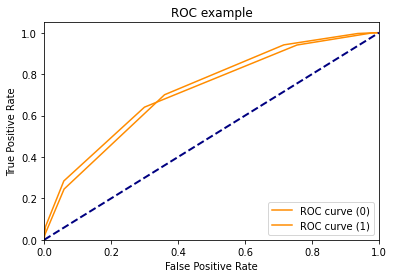

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
lw = 2
my_dict = roc_curve(df.actual_label, df.model_RF)
for key in my_dict:
    fpr = [x[0] for x in my_dict[key]]
    tpr = [x[1] for x in my_dict[key]]
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (%s)' % str(key))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.legend(loc="lower right")
plt.show()